In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

In [2]:
df = pd.read_csv('s4_august_by_hand_30plus.csv')

In [3]:
print(df.shape)
df.head()

(950, 41)


,FmPrime,FoPrime,Fs,FvP/FmP,LEF,NPQt,Phi2,PhiNO,PhiNPQ,RFd,...,leaf_thickness,light_intensity_PAR,pitch,proximal_air_temperature,qL,qP,range,relative_chlorophyll,roll,season
0,2986.150,2233.0,2316.8,0.252,157.363,13.480,0.224,0.054,0.722,0.289,...,0.42,1560.0,1.92,44.490002,0.857,0.889,21,34.795411,-2.60,4
1,4181.791,2583.0,3221.0,0.382,158.183,6.886,0.230,0.098,0.673,0.298,...,0.15,1530.0,36.11,43.740002,0.482,0.601,26,49.602294,-39.74,4
2,5116.053,2321.0,3569.2,0.546,177.017,3.051,0.302,0.172,0.525,0.433,...,0.57,1301.0,5.31,43.770000,0.360,0.553,26,46.183556,-17.32,4
3,1902.247,1759.0,1757.1,0.076,53.598,58.729,0.076,0.015,0.908,0.083,...,0.46,1561.0,-1.62,43.950001,1.011,1.010,21,33.009560,-0.90,4
4,1749.371,1476.0,1512.8,0.156,94.147,25.393,0.135,0.033,0.832,0.156,...,1.08,1547.0,12.25,45.700001,0.846,0.867,45,34.042065,11.29,4


In [4]:
df.describe()

,FmPrime,FoPrime,Fs,FvP/FmP,LEF,NPQt,Phi2,PhiNO,PhiNPQ,RFd,...,leaf_thickness,light_intensity_PAR,pitch,proximal_air_temperature,qL,qP,range,relative_chlorophyll,roll,season
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,948.000000,948.000000,949.000000,...,949.00000,949.000000,949.000000,949.000000,949.000000,948.000000,949.000000,949.000000,948.000000,949.0
mean,4371.353999,2401.363541,3288.642677,0.375852,130.308917,15.279163,0.214661,0.112436,0.672845,0.290495,...,0.36373,1429.640674,8.965543,42.256586,0.561861,0.672477,30.014752,44.470379,-9.169409,4.0
std,2065.736267,434.218301,1219.280078,0.174360,41.617030,40.011664,0.086130,0.073849,0.151709,0.159491,...,0.43847,323.360804,11.046642,3.812595,0.796681,0.696085,10.176905,6.721767,24.596650,0.0
min,922.884000,828.000000,852.800000,0.006000,15.496000,0.572000,0.036000,0.001000,0.181000,0.037000,...,0.08000,84.000000,-29.950000,28.709999,0.070000,0.199000,16.000000,15.996176,-82.170000,4.0
25%,2816.855000,2117.000000,2369.300000,0.237000,100.773000,3.858000,0.158000,0.052000,0.590750,0.188000,...,0.13000,1277.000000,1.570000,40.270000,0.341000,0.511000,21.000000,39.759082,-25.912500,4.0
50%,4006.189000,2413.000000,3062.500000,0.395000,140.537000,6.461000,0.217000,0.104000,0.672000,0.277000,...,0.16000,1526.000000,9.270000,42.980000,0.450000,0.584000,26.000000,45.082218,-8.105000,4.0
75%,5282.744000,2691.000000,3951.600000,0.501000,160.542000,14.744000,0.259000,0.153250,0.785500,0.350000,...,0.40000,1665.000000,16.060000,45.020000,0.608000,0.677500,45.000000,49.074570,6.017500,4.0
max,12601.012000,3708.000000,9397.400000,0.756000,225.302000,798.181000,0.528000,0.426000,0.955000,1.118000,...,4.80000,2338.000000,53.270000,48.860001,14.910000,13.151000,45.000000,64.458891,67.630000,4.0


In [11]:
# drop date column, so everything is numeric
nodate = df.drop(['date','cultivar','cultivar_id','season'],axis=1)
cultivar = df['cultivar'].values
print(nodate.shape)
print(cultivar.shape)
cultivar[0:4]

(949, 37)
(949,)


array([6000000964, 6000000851, 6000000851, 6000000964])

In [12]:
nodate.dtypes

FmPrime                          float64
FoPrime                          float64
Fs                               float64
FvP/FmP                          float64
LEF                              float64
NPQt                             float64
Phi2                             float64
PhiNO                            float64
PhiNPQ                           float64
RFd                              float64
SPAD_420                         float64
SPAD_530                         float64
SPAD_605                         float64
SPAD_650                         float64
SPAD_730                         float64
SPAD_850                         float64
SPAD_880                         float64
absorbance_530                   float64
absorbance_605                   float64
absorbance_730                   float64
absorbance_850                   float64
absorbance_880                   float64
absorbance_940                   float64
ambient_humidity                 float64
column          

In [13]:
# drop NAs; there were some missing data entries in the source.  It looks like this step drops out approximately 80 rows.... 
clean_df = nodate.dropna()
clean_df.shape

(869, 37)

In [14]:
# normalize each column of the data separately since there are some large values (e.g. FoPrime)

train_data = clean_df.values

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

print(train_data[0:5])
normalized = train_data

[[-6.58095853e-01 -3.70919366e-01 -7.87306562e-01 -6.92023424e-01
   6.45762824e-01 -4.74810794e-02  1.64632927e-01 -7.77517603e-01
   2.86605946e-01  5.30805856e-02 -1.42320935e+00 -1.70419256e+00
  -1.44064162e+00 -1.43378997e+00 -1.76722182e+00  1.08865157e+00
   1.67754188e-01 -1.48297258e+00 -1.30532194e+00 -1.13495310e+00
   4.56070902e-01  3.10939902e-01  2.86596244e-01 -1.30114899e+00
  -1.37891436e+00 -1.48311427e+00  8.31761945e-01  4.90983581e-01
   1.46781338e-01  3.80768865e-01 -6.52215302e-01  5.71357161e-01
   3.48504773e-01  2.95345653e-01 -8.91654088e-01 -1.44154118e+00
   2.70645385e-01]
 [-3.08294142e-02  4.53114096e-01 -3.42444092e-03  8.34816024e-02
   6.65413210e-01 -2.08126919e-01  2.38869377e-01 -1.44914920e-01
  -5.72840390e-02  1.15942981e-01  1.32826698e+00  9.48715344e-01
   6.49090575e-01  7.84018828e-01  1.87661016e-01  9.68902335e-03
   1.41423764e-01  1.02702247e+00  7.37775093e-01  6.20848443e-01
   6.75398857e-01  7.05664274e-01  7.37629089e-01 -7.9570

This is an alternative way to normalize the dataset, it will pass NAs through the step, so we still need to remove them by hand. 

In [26]:

train_data = nodate.values
transformer = RobustScaler().fit(train_data)
normalized =  transformer.transform(train_data)

In [15]:
normalized[0:4]

array([[-0.65809585, -0.37091937, -0.78730656, -0.69202342,  0.64576282,
        -0.04748108,  0.16463293, -0.7775176 ,  0.28660595,  0.05308059,
        -1.42320935, -1.70419256, -1.44064162, -1.43378997, -1.76722182,
         1.08865157,  0.16775419, -1.48297258, -1.30532194, -1.1349531 ,
         0.4560709 ,  0.3109399 ,  0.28659624, -1.30114899, -1.37891436,
        -1.48311427,  0.83176194,  0.49098358,  0.14678134,  0.38076887,
        -0.6522153 ,  0.57135716,  0.34850477,  0.29534565, -0.89165409,
        -1.44154118,  0.27064538],
       [-0.03082941,  0.4531141 , -0.00342444,  0.0834816 ,  0.66541321,
        -0.20812692,  0.23886938, -0.14491492, -0.05728404,  0.11594298,
         1.32826698,  0.94871534,  0.64909057,  0.78401883,  0.18766102,
         0.00968902,  0.14142376,  1.02702247,  0.73777509,  0.62084844,
         0.67539886,  0.70566427,  0.73762909, -0.07957015,  1.03809038,
         1.79336529, -0.23713294, -0.61538441, -0.47509128,  0.28352033,
         2.43183

In [16]:


# cluster the dataset into a fixed number of clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(normalized)

# print out the n-dimensional locations of the center of each cluster in Cartesian coords.
print(kmeans.cluster_centers_)


[[-3.29491979e-02  6.77183959e-02 -1.83525123e-03  1.88190479e-01
   4.35775597e-01 -1.88608448e-01  1.33972404e-01  5.61470466e-02
  -1.03056005e-01  6.05094993e-02  5.14103182e-01  4.96981162e-01
   5.00315841e-01  4.74117774e-01  2.95517726e-01  2.07895998e-01
   2.71949909e-01  5.23804634e-01  5.30293450e-01  4.46156852e-01
   3.32939419e-01  3.63428171e-01  3.29847201e-01 -2.86123343e-01
   5.02337303e-01  1.63678900e-01 -2.33392962e-01 -5.30491764e-01
   1.61227047e-01  2.52810265e-01  2.88145227e-02  2.76473513e-01
  -1.53954288e-01 -1.49993411e-01 -2.18859422e-01  4.81642403e-01
  -7.74817397e-02]
 [-9.02043343e-01 -8.91700949e-01 -9.21608982e-01 -1.10078669e+00
  -9.68517464e-01  3.55206444e-01 -9.40864098e-01 -9.58360210e-01
   1.00068289e+00 -8.43963834e-01 -9.58876086e-01 -8.79282203e-01
  -9.10100770e-01 -9.98376786e-01 -9.84329511e-01  9.49598728e-02
   3.40752471e-01 -8.06116344e-01 -8.60420297e-01 -7.52658100e-01
  -1.17993732e-02  6.20574665e-02 -3.38527940e-02 -2.4874

In [17]:
import numpy as np
from statsmodels.multivariate.pca import PCA

In [22]:
pc = PCA(normalized,ncomp=5)

In [23]:
pc.factors.shape

(869, 5)

In [27]:
print(pc.factors)

[[-0.04069152 -0.01327804 -0.05132412  0.01521476  0.01506682]
 [ 0.02056667  0.0283551   0.00804198 -0.00119326  0.01631794]
 [ 0.02441298  0.01945523 -0.04663917  0.02438862  0.01244756]
 ...
 [-0.00958798 -0.01948796 -0.02883294 -0.0112671   0.04365306]
 [ 0.03534016  0.00899335  0.00969308 -0.00764197 -0.02458649]
 [ 0.00839593 -0.00043161 -0.02953797  0.0485523  -0.02852176]]


## trying again with newer data drop including cultivar

In [34]:
df = pd.read_csv('s4_august_by_hand_30plus_v2.csv')

In [35]:
print(df.shape)
df.head()

(950, 41)


,cultivar_id,cultivar,season,range,column,absorbance_850,roll,PhiNO,PhiNPQ,absorbance_530,...,FmPrime,FoPrime,LEF,SPAD_420,SPAD_650,SPAD_850,SPAD_880,light_intensity_PAR,leaf_temperature,date
0,6000000964,PI570373,4,21,2,0.443,-2.60,0.054,0.722,0.990,...,2986.150,2233.0,157.363,135.13,34.80,-3.18,1.36,1560.0,315.48,2017-08-28 12:00:00
1,6000000851,PI511355,4,26,15,0.449,-39.74,0.098,0.673,1.270,...,4181.791,2583.0,158.183,188.25,49.60,-3.74,1.34,1530.0,310.14,2017-08-28 11:14:00
2,6000000851,PI511355,4,26,15,0.456,-17.32,0.172,0.525,1.224,...,5116.053,2321.0,177.017,171.18,46.18,-3.09,1.89,1301.0,307.44,2017-08-28 11:15:00
3,6000000964,PI570373,4,21,2,0.421,-0.90,0.015,0.908,0.997,...,1902.247,1759.0,53.598,134.03,33.01,-3.62,1.06,1561.0,318.92,2017-08-28 11:59:00
4,6000000964,PI570373,4,45,3,0.535,11.29,0.033,0.832,1.185,...,1749.371,1476.0,94.147,137.76,34.04,-3.79,1.20,1547.0,320.24,2017-08-28 12:10:00


In [36]:
df.describe()

,cultivar_id,season,range,column,absorbance_850,roll,PhiNO,PhiNPQ,absorbance_530,absorbance_605,...,relative_chlorophyll,FmPrime,FoPrime,LEF,SPAD_420,SPAD_650,SPAD_850,SPAD_880,light_intensity_PAR,leaf_temperature
count,9.500000e+02,950.0,950.000000,950.000000,949.000000,949.000000,949.000000,949.000000,949.000000,945.000000,...,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,877.000000
mean,6.000001e+09,4.0,30.030526,9.517895,0.429858,-9.165111,0.112457,0.672792,1.155538,1.377089,...,44.470379,4371.353999,2401.363541,130.308917,162.614584,44.455964,-3.763635,1.188293,1429.640674,311.345234
std,2.487444e+02,0.0,10.183155,5.362045,0.027904,24.584031,0.073813,0.151637,0.113126,0.147514,...,6.721767,2065.736267,434.218301,41.617030,19.305050,6.741748,0.532607,0.800825,323.360804,5.010778
min,6.000000e+09,4.0,16.000000,2.000000,0.334000,-82.170000,0.001000,0.181000,0.739000,0.849000,...,15.996176,922.884000,828.000000,15.496000,46.110000,16.000000,-5.000000,-1.950000,84.000000,301.640000
25%,6.000001e+09,4.0,21.000000,3.000000,0.413000,-25.880000,0.052000,0.591000,1.078000,1.281000,...,39.759082,2816.855000,2117.000000,100.773000,150.580000,39.760000,-4.050000,0.750000,1277.000000,307.400000
50%,6.000001e+09,4.0,26.000000,13.000000,0.427000,-8.090000,0.104000,0.672000,1.153000,1.376000,...,45.082218,4006.189000,2413.000000,140.537000,163.240000,44.980000,-3.810000,1.340000,1526.000000,310.330000
75%,6.000001e+09,4.0,45.000000,14.000000,0.444000,6.010000,0.153000,0.785000,1.233000,1.480000,...,49.074570,5282.744000,2691.000000,160.542000,174.250000,49.020000,-3.550000,1.760000,1665.000000,315.100000
max,6.000001e+09,4.0,45.000000,15.000000,0.570000,67.630000,0.426000,0.955000,1.536000,1.729000,...,64.458891,12601.012000,3708.000000,225.302000,214.060000,64.460000,-0.860000,2.920000,2338.000000,323.770000


In [37]:
# drop NAs; there were some missing data entries in the source.  It looks like this step drops out approximately 80 rows.... 
clean_df = df.dropna(axis=0)
clean_df = clean_df.dropna(axis=1)
clean_df.shape

(869, 41)

In [38]:
# drop date column, so everything is numeric
nodate = clean_df.drop(['date','cultivar','cultivar_id','season'],axis=1)
cultivar = clean_df['cultivar'].values
print(nodate.shape)
print(cultivar.shape)
cultivar[0:4]

(869, 37)
(869,)


array(['PI570373', 'PI511355', 'PI511355', 'PI570373'], dtype=object)

In [39]:
# normalize each column of the data separately since there are some large values (e.g. FoPrime)

train_data = nodate.values

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

print(train_data[0:5])
normalized = train_data

[[-8.91654088e-01 -1.37891436e+00  4.56070902e-01  2.70645385e-01
  -7.77517603e-01  2.86605946e-01 -1.48297258e+00 -1.30532194e+00
  -1.13495310e+00  3.10939902e-01  2.86596244e-01 -7.87306562e-01
  -4.74810794e-02  3.48504773e-01  2.95345653e-01  5.30805856e-02
  -1.70419256e+00 -1.44064162e+00 -1.76722182e+00  1.46781338e-01
  -1.30114899e+00 -1.48311427e+00 -6.52215302e-01  5.71357161e-01
  -6.92023424e-01  4.90983581e-01  1.64632927e-01 -1.44154118e+00
  -6.58095853e-01 -3.70919366e-01  6.45762824e-01 -1.42320935e+00
  -1.43378997e+00  1.08865157e+00  1.67754188e-01  3.80768865e-01
   8.31761945e-01]
 [-4.00311411e-01  1.03809038e+00  6.75398857e-01 -1.27355264e+00
  -1.44914920e-01 -5.72840390e-02  1.02702247e+00  7.37775093e-01
   6.20848443e-01  7.05664274e-01  7.37629089e-01 -3.42444092e-03
  -2.08126919e-01 -1.06113071e-01 -1.03859074e-01  1.15942981e-01
   9.48715344e-01  6.49090575e-01  1.87661016e-01 -4.75091277e-01
  -7.95701469e-02  1.79336529e+00  2.43183935e+00  3.6789

In [40]:

# cluster the dataset into a fixed number of clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(normalized)

# print out the n-dimensional locations of the center of each cluster in Cartesian coords.
print(kmeans.cluster_centers_)


[[ 1.44800843e-01 -2.09584541e-01 -9.23120292e-01 -3.41117554e-02
   1.37492297e+00 -1.29923405e+00 -2.15064255e-01 -1.50341122e-01
  -7.80743984e-02 -1.13164340e+00 -8.77218065e-01  1.46569030e+00
  -3.06666345e-01 -3.01402410e-01 -2.13302124e-01  1.16338600e+00
  -2.48120177e-02  1.22051055e-02  7.10387931e-01 -1.81465423e-01
   1.22728630e+00  1.62416915e-01  4.02632422e-02 -1.36686939e+00
   1.23210697e+00 -1.06109931e-01  1.10776268e+00  2.04234992e-01
   1.52335669e+00  1.18782914e+00  3.06644302e-01  5.49540408e-02
   2.24995673e-01 -7.49971376e-01 -1.33473595e+00 -9.49048800e-01
  -1.09080360e+00]
 [-2.20331620e-01  4.98220778e-01  3.31209145e-01 -7.90745304e-02
   5.70913370e-02 -1.05136546e-01  5.23552300e-01  5.30288548e-01
   4.45652490e-01  3.62056983e-01  3.28047840e-01  1.56738153e-04
  -1.88819296e-01 -1.53876130e-01 -1.49759004e-01  6.35194419e-02
   4.97134785e-01  5.00624109e-01  2.96505042e-01  1.59582671e-01
  -2.88508688e-01  1.64021106e-01  2.87869023e-02  2.7615

Now do the sillhouette analysis to figure out how many clusters this data seems to have naturally.  Ideally, we hope the clusters will align with the cultivar.  That would possibly indicate genetic signal. 

In [42]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [43]:
range_n_clusters = [ 2, 3, 4, 5, 6, 7, 8, 9, 10]

s_values = []
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(normalized)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(normalized, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    s_values.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(normalized, cluster_labels)


For n_clusters = 2 The average silhouette_score is : 0.22165353329301826
For n_clusters = 3 The average silhouette_score is : 0.20859753862657837
For n_clusters = 4 The average silhouette_score is : 0.21086539366902243
For n_clusters = 5 The average silhouette_score is : 0.16392694222101645
For n_clusters = 6 The average silhouette_score is : 0.1572808628258507
For n_clusters = 7 The average silhouette_score is : 0.16171666175542937
For n_clusters = 8 The average silhouette_score is : 0.15541149636764098
For n_clusters = 9 The average silhouette_score is : 0.14309069085315787
For n_clusters = 10 The average silhouette_score is : 0.14865130260625223


In [44]:
import altair as alt
import pandas as pd

data = pd.DataFrame({'x': range_n_clusters,
                     'y': s_values})
alt.Chart(data).mark_bar().encode(
    x='x',
    y='y',
)

alt.Chart(...)

In [45]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

For n_clusters = 2 The average silhouette_score is : 0.22165353329301826


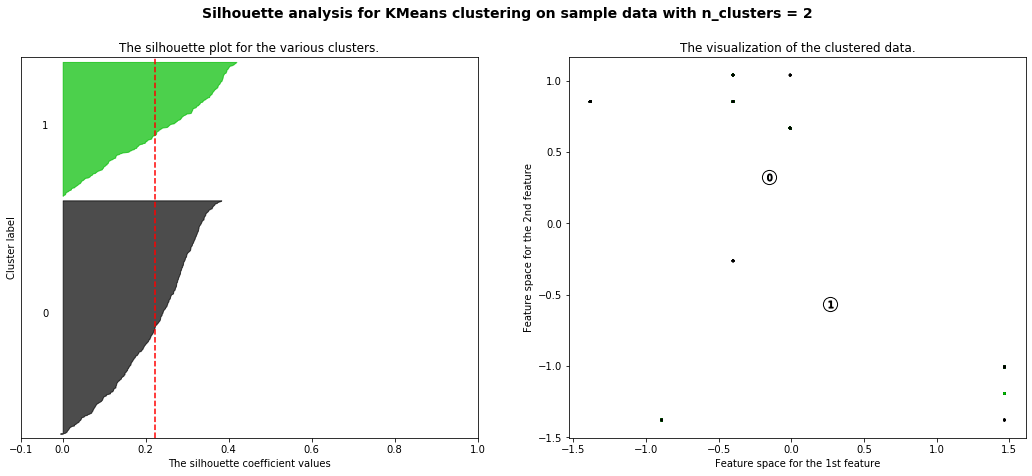

For n_clusters = 3 The average silhouette_score is : 0.20859753862657837


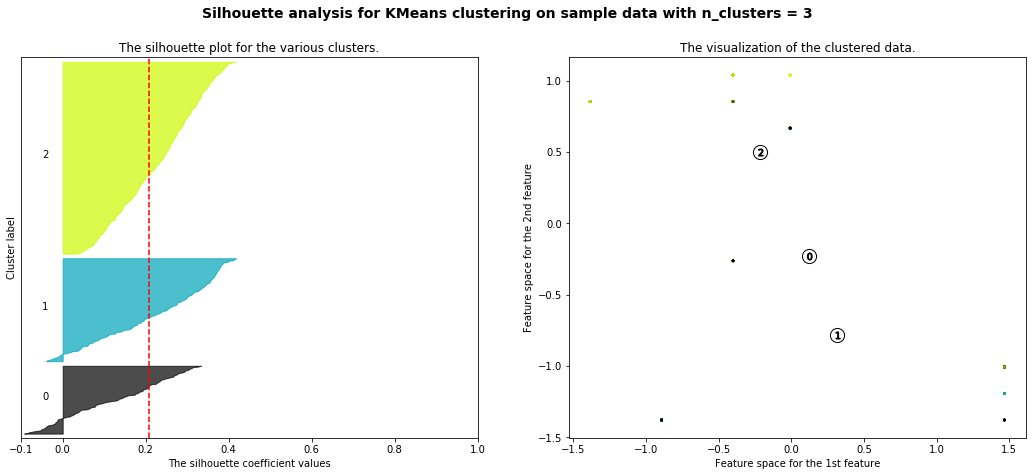

For n_clusters = 4 The average silhouette_score is : 0.21086539366902243


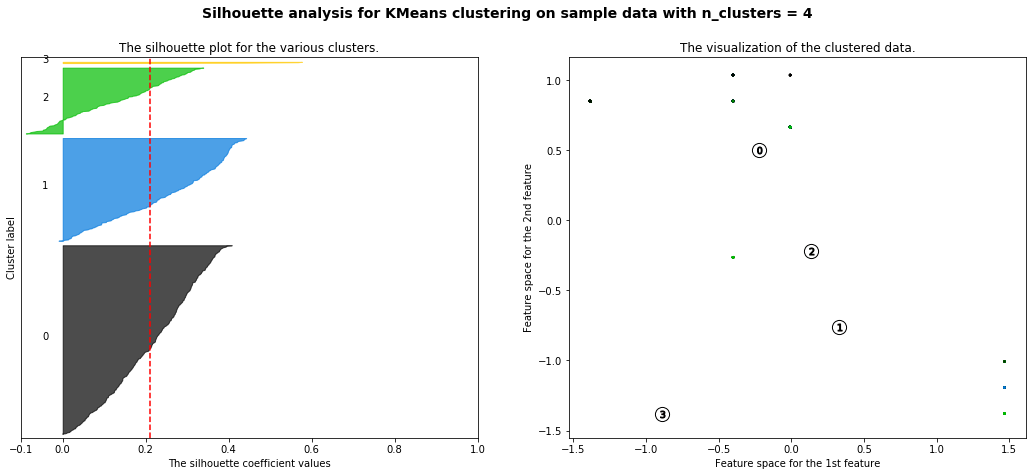

For n_clusters = 5 The average silhouette_score is : 0.16392694222101645


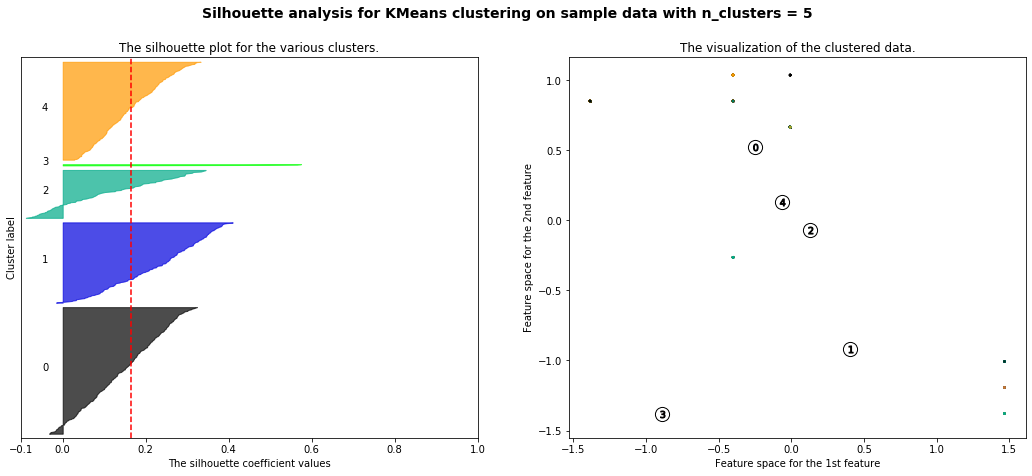

In [48]:
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(normalized) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(normalized)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(normalized, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
  # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(normalized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples


    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(normalized[:, 0], normalized[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### clustering the large, automatic leaf & canopy-height dataset

In [ ]:
Above, we clustered the 38 hand-measured 

In [49]:
df = pd.read_csv('s4_full_height_leaf_day_v2.csv')

In [50]:
print(df.shape)
df.head()

(9441, 14)


,canopy_height,cultivar,season,range,column,leaf_angle_mean,leaf_angle_alpha,leaf_angle_beta,leaf_angle_chi,date,day_offset,decision_tree,linearRegression,gboost
0,15.0,PI453696,4,43,2,0.435924,2.695956,1.977380,1.756464,2017-05-13 12:00:00,12.0,20.684211,42.392578,18.350263
1,15.0,PI145626,4,35,15,0.396782,3.265980,2.018623,1.941012,2017-05-13 12:00:00,12.0,16.200000,49.992035,15.788623
2,19.0,PI257600,4,42,2,0.471944,2.159610,1.809209,1.638744,2017-05-13 12:00:00,12.0,20.684211,47.234878,22.092549
3,13.0,PI569416,4,30,4,0.444099,3.042180,2.198751,1.732985,2017-05-13 12:00:00,12.0,16.200000,45.215572,17.007568
4,17.0,PI585454,4,45,2,0.462600,2.305345,1.872028,1.665387,2017-05-15 12:00:00,14.0,20.684211,51.286969,19.366635


In [51]:
# drop NAs; there were some missing data entries in the source.  It looks like this step drops out approximately 80 rows.... 
clean_df = df.dropna(axis=0)
clean_df = clean_df.dropna(axis=1)
clean_df.shape

(9441, 14)

In [55]:
# drop date column, so everything is numeric
nodate = clean_df.drop(['date','cultivar','season','day_offset','range','column','linearRegression','gboost','decision_tree'],axis=1)
cultivar = clean_df['cultivar'].values
print(nodate.shape)
print(cultivar.shape)
cultivar[0:4]

(9441, 5)
(9441,)


array(['PI453696', 'PI145626', 'PI257600', 'PI569416'], dtype=object)

In [56]:
nodate.head()

,canopy_height,leaf_angle_mean,leaf_angle_alpha,leaf_angle_beta,leaf_angle_chi
0,15.0,0.435924,2.695956,1.977380,1.756464
1,15.0,0.396782,3.265980,2.018623,1.941012
2,19.0,0.471944,2.159610,1.809209,1.638744
3,13.0,0.444099,3.042180,2.198751,1.732985
4,17.0,0.462600,2.305345,1.872028,1.665387


In [57]:
# normalize each column of the data separately since there are some large values (e.g. FoPrime)

train_data = nodate.values

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

print(train_data[0:5])
normalized = train_data

[[-1.88939749  0.3186326  -0.19247526  0.47189614 -0.62464634]
 [-1.88939749 -0.43334451  0.33704797  0.60028965  0.13274976]
 [-1.84803572  1.01062989 -0.6907134  -0.0516401  -1.10777414]
 [-1.91007838  0.47568546  0.1291496   1.16104992 -0.72100459]
 [-1.86871661  0.83111733 -0.5553328   0.14392315 -0.99843377]]


In [58]:
len(normalized)

9441

In [64]:
range_n_clusters = [ 2, 3, 4, 5, 6, 7, 8, 9, 10]

s_values = []
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(normalized)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(normalized, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    s_values.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(normalized, cluster_labels)


For n_clusters = 2 The average silhouette_score is : 0.38506073730823576
For n_clusters = 3 The average silhouette_score is : 0.31040517975401155
For n_clusters = 4 The average silhouette_score is : 0.31650960395302274
For n_clusters = 5 The average silhouette_score is : 0.3025978148303948
For n_clusters = 6 The average silhouette_score is : 0.3019981485696333
For n_clusters = 7 The average silhouette_score is : 0.2848232699574154
For n_clusters = 8 The average silhouette_score is : 0.27703429139943725
For n_clusters = 9 The average silhouette_score is : 0.27164931379841156
For n_clusters = 10 The average silhouette_score is : 0.26655796017486555


In [60]:
import altair as alt
import pandas as pd

data = pd.DataFrame({'x': range_n_clusters,
                     'y': s_values})
alt.Chart(data).mark_bar().encode(
    x='x',
    y='y',
)

alt.Chart(...)

In [61]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

For n_clusters = 2 The average silhouette_score is : 0.38506073730823576


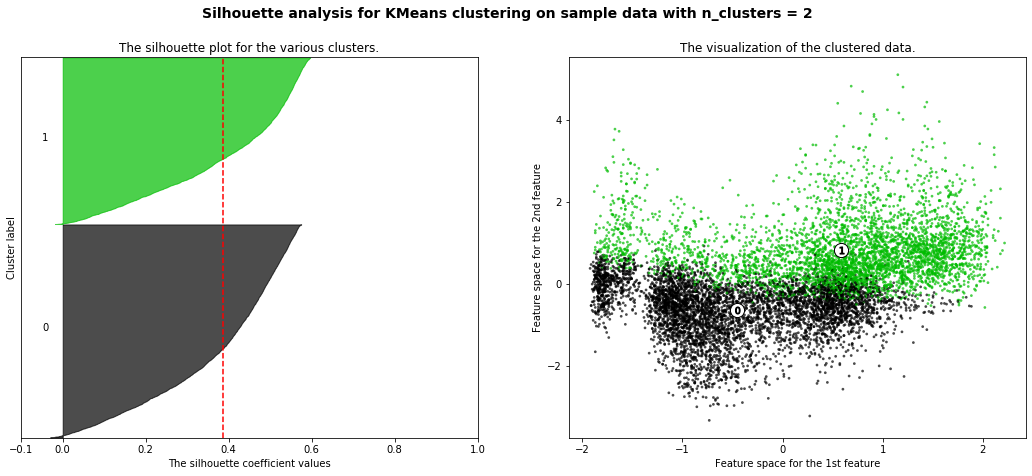

For n_clusters = 3 The average silhouette_score is : 0.31040517975401155


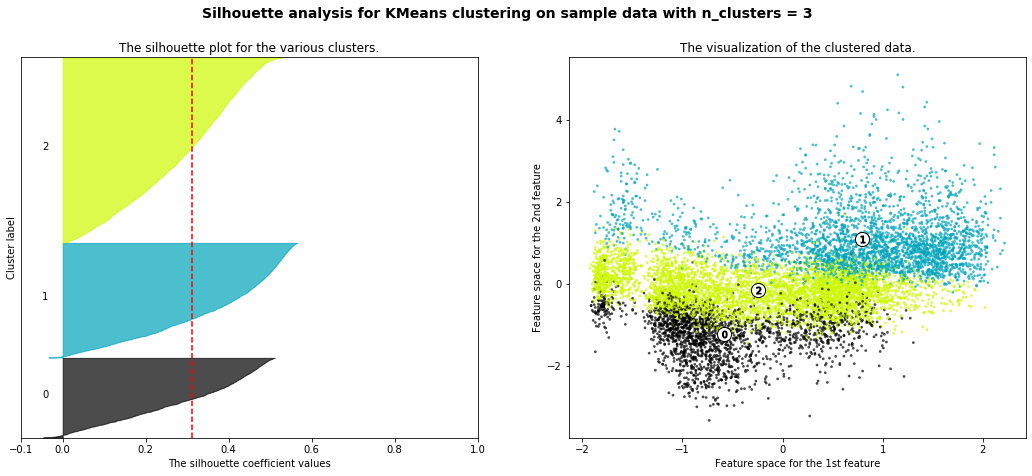

For n_clusters = 4 The average silhouette_score is : 0.31650960395302274


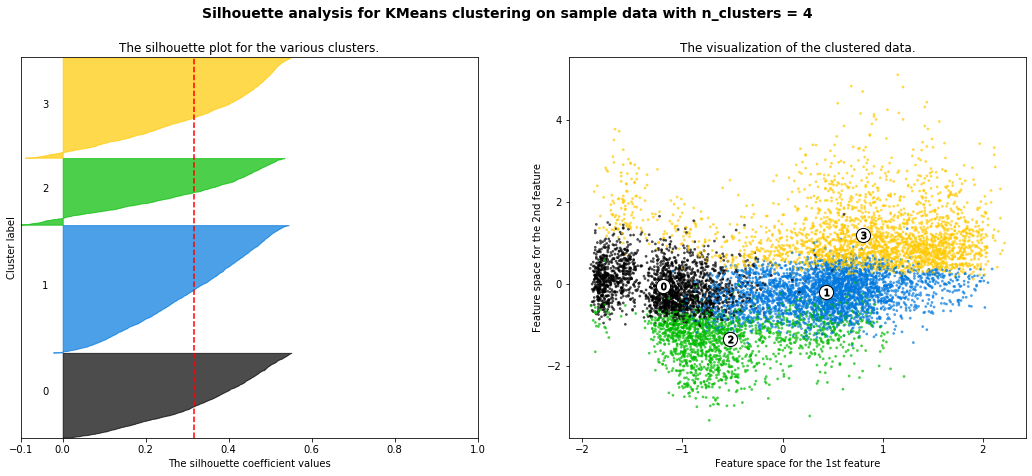

For n_clusters = 5 The average silhouette_score is : 0.3025978148303948


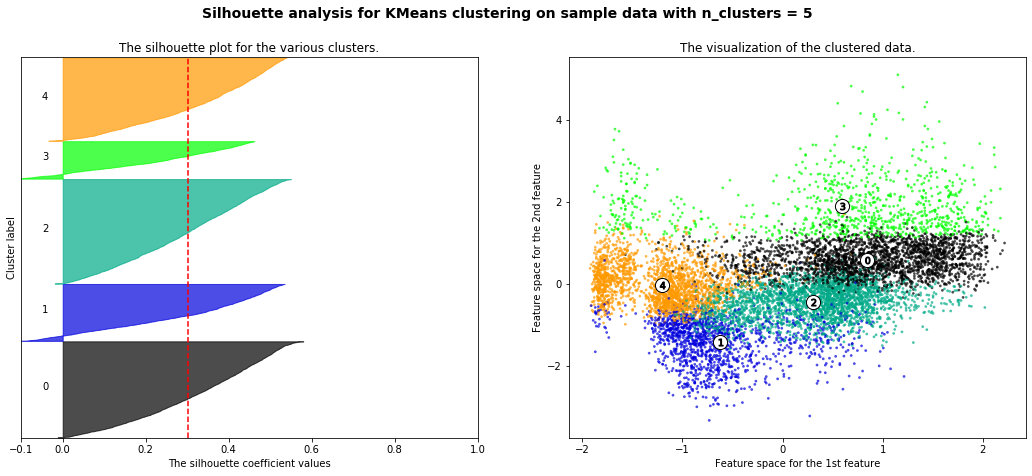

For n_clusters = 6 The average silhouette_score is : 0.3019981485696333


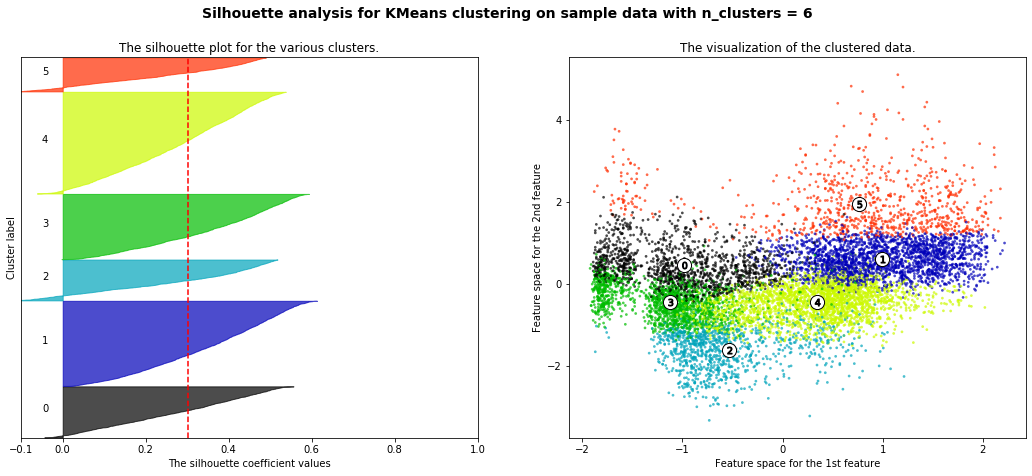

For n_clusters = 7 The average silhouette_score is : 0.2848232699574154


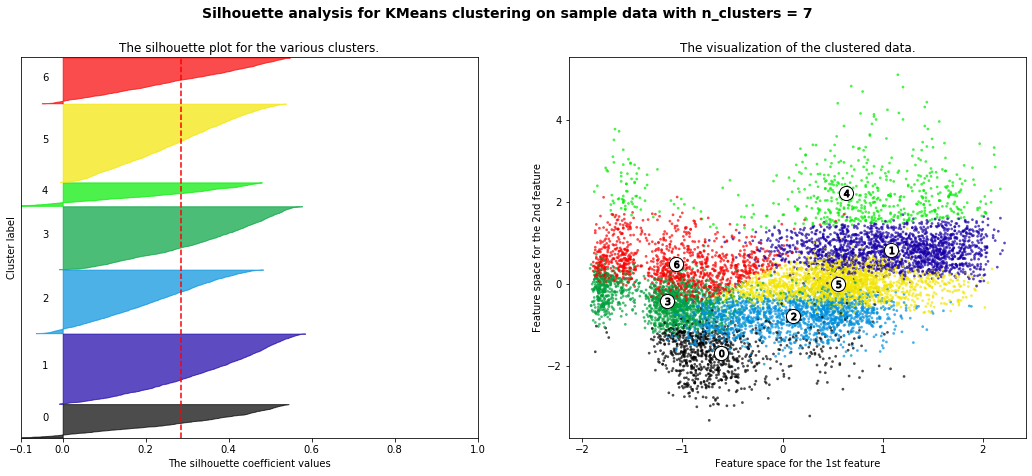

For n_clusters = 8 The average silhouette_score is : 0.27703429139943725


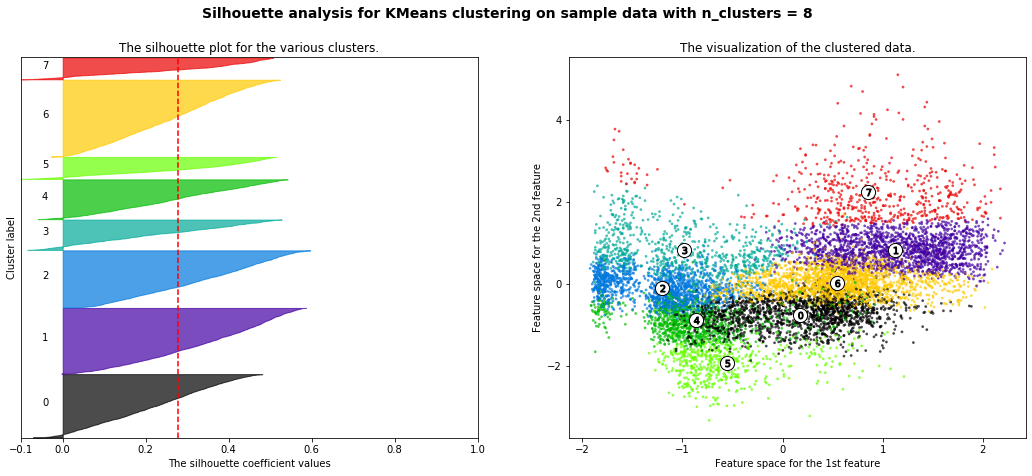

For n_clusters = 9 The average silhouette_score is : 0.27164931379841156


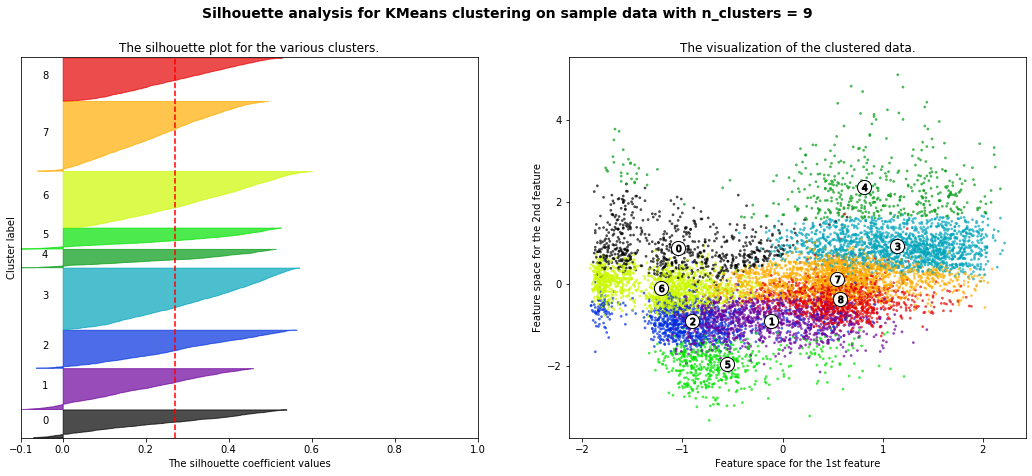

For n_clusters = 10 The average silhouette_score is : 0.26655796017486555


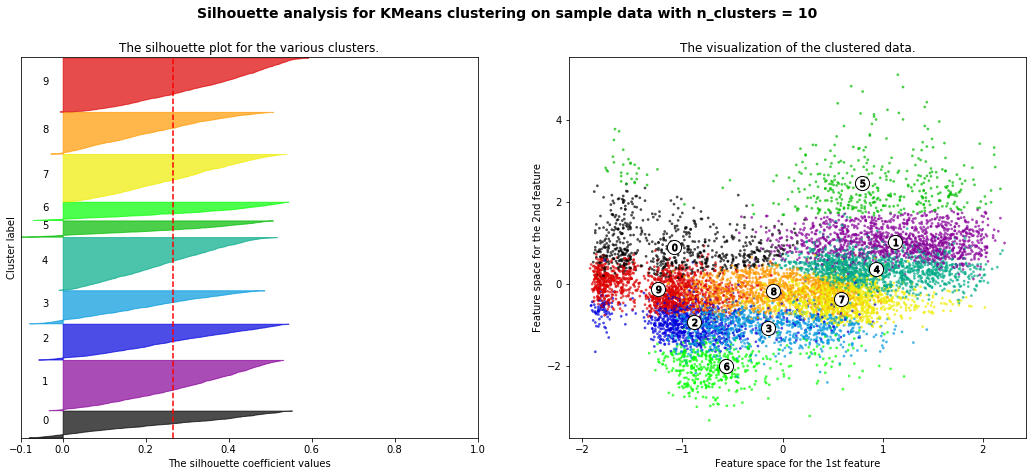

In [65]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(normalized) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(normalized)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(normalized, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
  # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(normalized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples


    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(normalized[:, 0], normalized[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()